In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

In [2]:
def init_spark():
    spark = SparkSession.builder.appName("Python Spark SQL basic example").config("spark.some.config.option", "some-value").getOrCreate()
    return spark
spark_object = init_spark()

23/03/29 20:03:48 WARN Utils: Your hostname, karyubuntu resolves to a loopback address: 127.0.1.1; using 172.31.170.192 instead (on interface wlp0s20f3)
23/03/29 20:03:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/29 20:03:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/29 20:03:50 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
train_spark = spark_object.read.option("delimiter", ",").csv("./data/trainbalanced.csv", header='true', inferSchema='true')
test_spark = spark_object.read.option("delimiter", ",").csv("./data/testbalanced.csv", header='true', inferSchema='true')

In [4]:
for i in train_spark.columns:
    oldname = i
    if "." in oldname:
        newname = oldname.replace(".","")
        train_spark = train_spark.withColumnRenamed(oldname, newname)
        test_spark = test_spark.withColumnRenamed(oldname, newname)

In [6]:
input_list =[]
for i in train_spark.columns:
    if i != 'isFraud':
        input_list.append(i)

In [7]:
assembler = VectorAssembler(inputCols=input_list,outputCol='features')

In [8]:
train_features = assembler.transform(train_spark)
test_features = assembler.transform(test_spark)

In [9]:
maxDepths = [5, 10, 12]
numTrees = [5, 10]

In [10]:
rf_models = []
for md in maxDepths:
    for nt in numTrees:
        print("-"*25)
        print("Depth: " + str(md))
        print("numTrees: " + str(nt))
        rf = RandomForestClassifier(featuresCol='features', labelCol='isFraud', maxDepth=md, numTrees=nt)
        model = rf.fit(train_features)
        predictions = model.transform(train_features)
        y_train_pred=predictions.select("prediction").collect()
        y_train_orig=predictions.select("isFraud").collect()
        print('Training Report')
        print(classification_report(y_train_orig, y_train_pred))
        
        predictions = model.transform(test_features)
        y_test_pred=predictions.select("prediction").collect()
        y_test_orig=predictions.select("isFraud").collect()
        print('Test Report')
        print(classification_report(y_test_orig, y_test_pred))
        rf_models.append(model)


-------------------------
Depth: 5
numTrees: 5


23/03/29 20:04:20 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Training Report
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92     93062
         1.0       0.93      0.90      0.91     93062

    accuracy                           0.91    186124
   macro avg       0.92      0.91      0.91    186124
weighted avg       0.92      0.91      0.91    186124



Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     39853
         1.0       0.42      0.61      0.50      3417

    accuracy                           0.90     43270
   macro avg       0.69      0.77      0.72     43270
weighted avg       0.92      0.90      0.91     43270

-------------------------
Depth: 5
numTrees: 10


Training Report
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     93062
         1.0       0.93      0.90      0.92     93062

    accuracy                           0.92    186124
   macro avg       0.92      0.92      0.92    186124
weighted avg       0.92      0.92      0.92    186124



Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     39853
         1.0       0.44      0.61      0.51      3417

    accuracy                           0.91     43270
   macro avg       0.70      0.77      0.73     43270
weighted avg       0.92      0.91      0.92     43270

-------------------------
Depth: 10
numTrees: 5


Training Report
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     93062
         1.0       0.97      0.95      0.96     93062

    accuracy                           0.96    186124
   macro avg       0.96      0.96      0.96    186124
weighted avg       0.96      0.96      0.96    186124

Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     39853
         1.0       0.65      0.61      0.63      3417

    accuracy                           0.94     43270
   macro avg       0.81      0.79      0.80     43270
weighted avg       0.94      0.94      0.94     43270

-------------------------
Depth: 10
numTrees: 10


23/03/29 20:05:29 WARN DAGScheduler: Broadcasting large task binary with size 1222.2 KiB


Training Report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     93062
         1.0       0.98      0.96      0.97     93062

    accuracy                           0.97    186124
   macro avg       0.97      0.97      0.97    186124
weighted avg       0.97      0.97      0.97    186124



Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     39853
         1.0       0.68      0.62      0.65      3417

    accuracy                           0.95     43270
   macro avg       0.82      0.80      0.81     43270
weighted avg       0.95      0.95      0.95     43270

-------------------------
Depth: 12
numTrees: 5


23/03/29 20:05:54 WARN DAGScheduler: Broadcasting large task binary with size 1295.0 KiB


Training Report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     93062
         1.0       0.98      0.96      0.97     93062

    accuracy                           0.97    186124
   macro avg       0.97      0.97      0.97    186124
weighted avg       0.97      0.97      0.97    186124



Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     39853
         1.0       0.71      0.61      0.66      3417

    accuracy                           0.95     43270
   macro avg       0.84      0.80      0.81     43270
weighted avg       0.95      0.95      0.95     43270

-------------------------
Depth: 12
numTrees: 10


23/03/29 20:06:19 WARN DAGScheduler: Broadcasting large task binary with size 1222.2 KiB


23/03/29 20:06:21 WARN DAGScheduler: Broadcasting large task binary with size 1765.0 KiB


23/03/29 20:06:24 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/29 20:06:46 WARN DAGScheduler: Broadcasting large task binary with size 1603.1 KiB


Training Report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     93062
         1.0       0.99      0.96      0.98     93062

    accuracy                           0.98    186124
   macro avg       0.98      0.98      0.98    186124
weighted avg       0.98      0.98      0.98    186124

23/03/29 20:06:56 WARN DAGScheduler: Broadcasting large task binary with size 1596.1 KiB


Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     39853
         1.0       0.74      0.63      0.68      3417

    accuracy                           0.95     43270
   macro avg       0.85      0.80      0.83     43270
weighted avg       0.95      0.95      0.95     43270



Text(0.5, 1.0, 'Class - Legitimate Transection for 5 Trees')

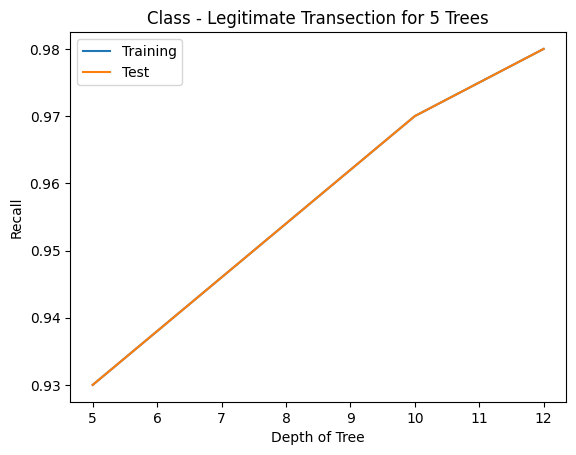

In [3]:
x = [5, 10,12]
y_train = [0.93, 0.97, 0.98]
y_test = [0.93, 0.97, 0.98]
plt.plot(x,y_train, label = "Training")
plt.plot(x,y_test, label = "Test")
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Recall')
plt.title('Class - Legitimate Transection for 5 Trees')

Text(0.5, 1.0, 'Class - Fraud Transection for 5 Trees')

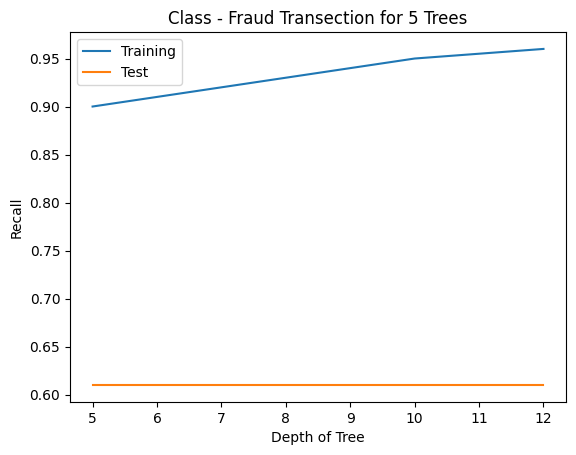

In [4]:
x = [5, 10,12]
y_train = [0.90, 0.95, 0.96]
y_test = [0.61, 0.61, 0.61]
plt.plot(x,y_train, label = "Training")
plt.plot(x,y_test, label = "Test")
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Recall')
plt.title('Class - Fraud Transection for 5 Trees')

Text(0.5, 1.0, 'Class - Legitimate Transection for 10 Trees')

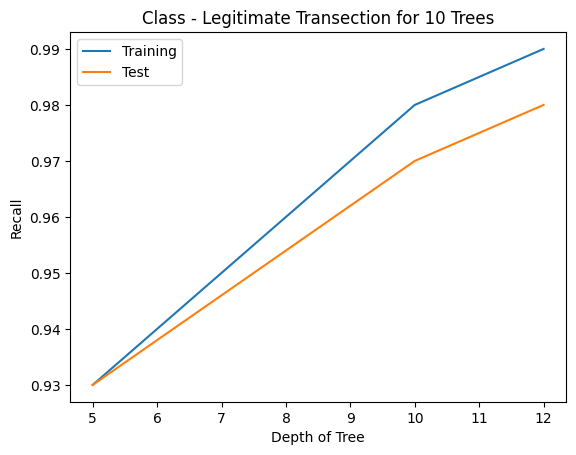

In [5]:
x = [5, 10,12]
y_train = [0.93, 0.98, 0.99]
y_test = [0.93, 0.97, 0.98]
plt.plot(x,y_train, label = "Training")
plt.plot(x,y_test, label = "Test")
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Recall')
plt.title('Class - Legitimate Transection for 10 Trees')

Text(0.5, 1.0, 'Class - Fraud Transection for 10 Trees')

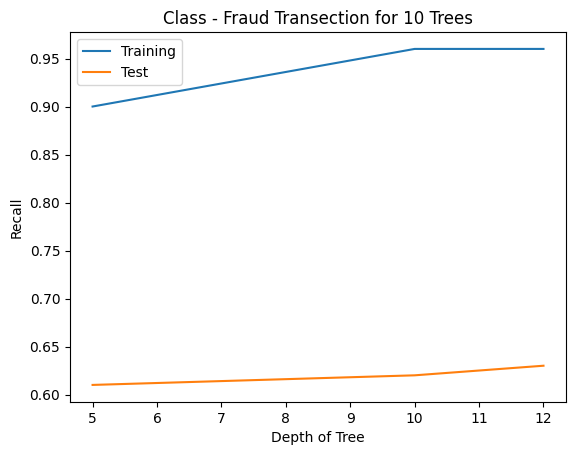

In [7]:
x = [5, 10,12]
y_train = [0.90, 0.96, 0.96]
y_test = [0.61, 0.62, 0.63]
plt.plot(x,y_train, label = "Training")
plt.plot(x,y_test, label = "Test")
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Recall')
plt.title('Class - Fraud Transection for 10 Trees')